# Comparacion entre modelos

In [1]:
import tensorflow as tf
import numpy as np

### Cargar Modelos

In [2]:
model_hsv_128_128_3 = tf.keras.models.load_model('Modelos/HSV_128_128_3/best_model_hsv_128_128_3.keras')
model_hsv_224_224_3 = tf.keras.models.load_model('Modelos/HSV_224_224_3/best_model_hsv_224_224_3.keras')
model_rgb_128_128_3 = tf.keras.models.load_model('Modelos/RGB_128_128_3/best_model_rgb_128_128_3.keras')
model_rgb_224_224_3 = tf.keras.models.load_model('Modelos/RGB_224_224_3/best_model_rgb_224_224_3.keras')
mejor_model = tf.keras.models.load_model('Modelos/Best_Model_Global.keras')

### Cargar Conjuntos de Prueba

In [3]:
X_test_hsv_128_128_3 = np.load('Modelos/HSV_128_128_3/X_test.npy')
y_test_hsv_128_128_3 = np.load('Modelos/HSV_128_128_3/y_test.npy')

In [4]:
X_test_hsv_224_224_3 = np.load('Modelos/HSV_224_224_3/X_test.npy')
y_test_hsv_224_224_3 = np.load('Modelos/HSV_224_224_3/y_test.npy')

In [5]:
X_test_rgb_128_128_3 = np.load('Modelos/RGB_128_128_3/X_test.npy')
y_test_rgb_128_128_3 = np.load('Modelos/RGB_128_128_3/y_test.npy')

In [6]:
X_test_rgb_224_224_3 = np.load('Modelos/RGB_224_224_3/X_test.npy')
y_test_rgb_224_224_3 = np.load('Modelos/RGB_224_224_3/y_test.npy')

### Summary

In [7]:
def mostrar_info_optimizador(modelo):
    """
    Muestra el tipo de optimizador, el learning rate y la configuración completa
    de un modelo Keras cargado.
    
    Parámetros:
        modelo: modelo Keras ya cargado con tf.keras.models.load_model
    """
    if modelo.optimizer is None:
        print("El modelo no tiene optimizador (puede haber sido guardado sin compilar).")
        return

    optimizador = modelo.optimizer
    print("Tipo de optimizador:", type(optimizador))
    
    # Intentar mostrar el learning rate (algunos optimizadores lo tienen como objeto)
    try:
        lr = optimizador.learning_rate
        if hasattr(lr, 'numpy'):
            print("Learning rate:", lr.numpy())
        else:
            print("Learning rate:", lr)
    except AttributeError:
        print("No se pudo acceder al learning rate.")

    print("Configuración completa del optimizador:")
    print(optimizador.get_config())


##### HSV

In [8]:
print('Modelo HSV, 128x128x3')
print(mostrar_info_optimizador(model_hsv_128_128_3))
model_hsv_128_128_3.summary()

Modelo HSV, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.001
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,491,677 (5.69 MB)

 Trainable params: 496,905 (1.90 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 993,812 (3.79 MB)

In [9]:
print('Modelo HSV, 224x224x3')
print(mostrar_info_optimizador(model_hsv_224_224_3))
model_hsv_224_224_3.summary()

Modelo HSV, 224x224x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

##### RGB

In [10]:
print('Modelo RGB, 128x128x3')
print(mostrar_info_optimizador(model_rgb_128_128_3))
model_rgb_128_128_3.summary()

Modelo RGB, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,417,565 (5.41 MB)

 Trainable params: 472,201 (1.80 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 944,404 (3.60 MB)

In [11]:
print('Modelo HSV, 128x128x3')
print(mostrar_info_optimizador(model_rgb_224_224_3))
model_rgb_224_224_3.summary()


Modelo HSV, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

In [12]:
print("Mejor modelo")
print(mostrar_info_optimizador(mejor_model))
mejor_model.summary()

Mejor modelo
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 63, 63, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 30, 30, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

### Matriz de Confusión

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu modelo entrenado y datos de prueba
# X_test, y_test (one-hot o etiquetas)
# model: tu CNN ya entrenada
def plot_confusion_matrix(model, X_test, y_test, title='Confusion Matrix'):
    # Si y_test está en one-hot encoding, conviértelo a etiquetas
    y_true = np.argmax(y_test, axis=1)

    # Obtener predicciones del modelo
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

##### HSV

110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 248ms/step


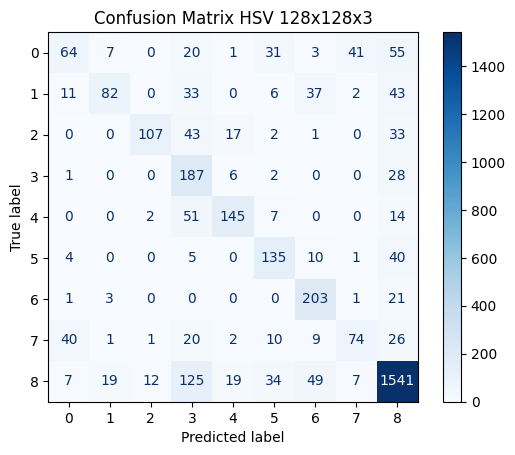

In [14]:
plot_confusion_matrix(model_hsv_128_128_3, X_test_hsv_128_128_3, y_test_hsv_128_128_3, title='Confusion Matrix HSV 128x128x3')


110/110 ━━━━━━━━━━━━━━━━━━━━ 64s 568ms/step


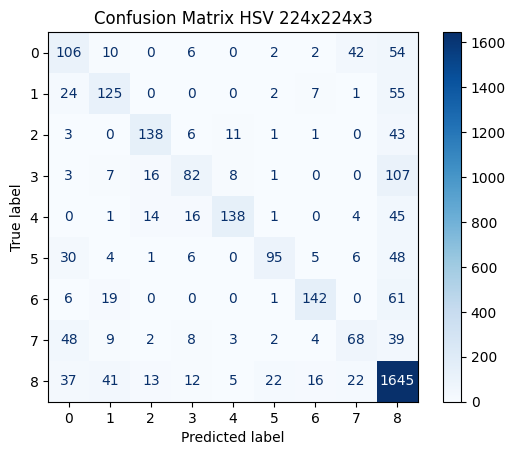

In [15]:
plot_confusion_matrix(model_hsv_224_224_3, X_test_hsv_224_224_3, y_test_hsv_224_224_3, title='Confusion Matrix HSV 224x224x3')

##### RGB

110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step


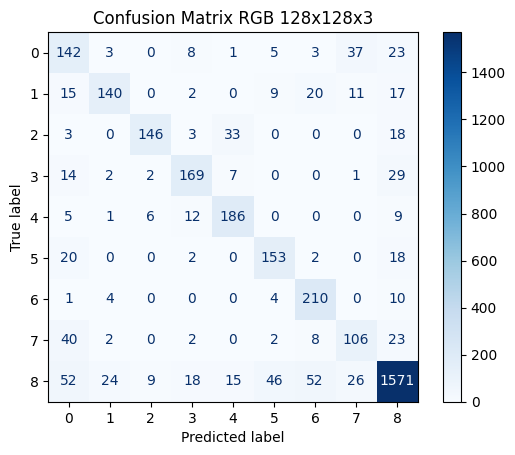

In [16]:
plot_confusion_matrix(model_rgb_128_128_3, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Confusion Matrix RGB 128x128x3')


110/110 ━━━━━━━━━━━━━━━━━━━━ 54s 485ms/step


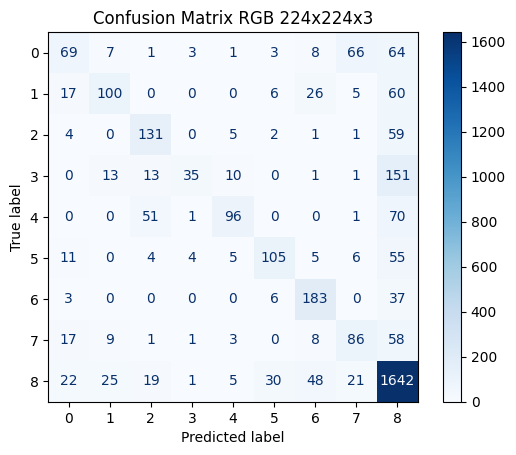

In [17]:
plot_confusion_matrix(model_rgb_224_224_3, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='Confusion Matrix RGB 224x224x3')

##### Mejor

110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step


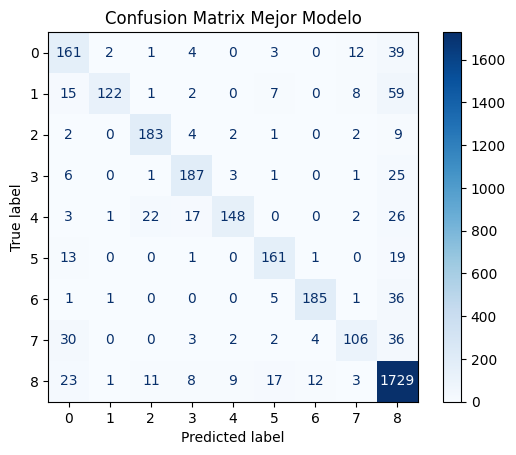

In [18]:
plot_confusion_matrix(mejor_model, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Confusion Matrix Mejor Modelo')

### Evaluación del Modelo

In [19]:
def evaluar(model, X_test, y_test, title='Evaluación del Modelo'):
    print(title)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')

##### HSV

In [20]:
evaluar(model_hsv_128_128_3, X_test_hsv_128_128_3, y_test_hsv_128_128_3, title='HSV 128x128x3')


HSV 128x128x3
110/110 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - accuracy: 0.7252 - loss: 1.0102
Precisión en el conjunto de prueba: 72.47%


In [21]:
evaluar(model_hsv_224_224_3, X_test_hsv_224_224_3, y_test_hsv_224_224_3, title='HSV 224x224x3')

HSV 224x224x3
110/110 ━━━━━━━━━━━━━━━━━━━━ 69s 617ms/step - accuracy: 0.7162 - loss: 0.9610
Precisión en el conjunto de prueba: 72.50%


##### RGB

In [22]:
evaluar(model_rgb_128_128_3, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='RGB 128x128x3')

RGB 128x128x3
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 237ms/step - accuracy: 0.7900 - loss: 0.9554
Precisión en el conjunto de prueba: 80.61%


In [23]:
evaluar(model_rgb_224_224_3, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='RGB 224x224x3')

RGB 224x224x3
110/110 ━━━━━━━━━━━━━━━━━━━━ 60s 541ms/step - accuracy: 0.6977 - loss: 1.0177
Precisión en el conjunto de prueba: 69.87%


##### Mejor

In [24]:
evaluar(mejor_model, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Mejor Modelo')

Mejor Modelo
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8567 - loss: 0.7671
Precisión en el conjunto de prueba: 85.15%
